In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import regex
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import NMF
import string
import gensim 
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.corpora import Dictionary

from gensim.models import CoherenceModel

In [2]:
from gensim.models import nmf

In [3]:
df=pd.read_csv('reddit.csv')

### EDA & Data Cleaning 

In [4]:
df.head()
df.drop('Unnamed: 0',axis=1,inplace=True)


In [5]:
#remove empty rows
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [6]:
#check for duplicates 
df[df.duplicated()]

,index,title,post


In [13]:
#df.drop('level_0',axis=1,inplace=True)
df.drop('index',axis=1,inplace=True)


In [14]:
df.head()

,title,post
0,any good military text-based rpg?,Hey guys\n\nI used to play a game from Storm8 ...
1,FC 6 Defeat Admiral Benitez BROKEN,In one try I fell trough a “floor” into broken...
2,Games with great sound design,"We can all appreciate good sound, right? But w..."
3,I need a game recommendation,"Hi all,\n\nI'm 72, retired, and bored to tears..."
4,Why did Valve made that terrible card game?,I like Valve since they usually do a good job ...


In [43]:
df.head()

,title,post,token
0,any good military text-based rpg?,hey guy used play game called world war s b...,"[hey, guy, used, play, game, called, world, wa..."
1,FC 6 Defeat Admiral Benitez BROKEN,one try fell trough “ floor ” broken video gam...,"[one, try, fell, trough, “, floor, ”, broken, ..."
2,Games with great sound design,appreciate good sound right game excellent...,"[appreciate, good, sound, right, game, excelle..."
3,I need a game recommendation,hi m retired bored tear thing reading...,"[hi, m, retired, bored, tear, thing, reading, ..."
4,Why did Valve made that terrible card game?,valve since usually good job private corporati...,"[valve, since, usually, good, job, private, co..."


In [15]:
#URL link removal
removeUrl = lambda x: re.sub('https?:\/\/[\da-z\.-]+\.[a-z\.]{2,6}[^\s]+', "", x)
df['post']=df.post.map(removeUrl)

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/safarji/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
#text lower and number removal 
df['post']= df['post'].apply(lambda x: x.lower())
remove_num = lambda x: re.sub('\w*\d\w*', ' ', x)
df['post']=df.post.map(remove_num)

In [19]:
# toknize
df['post']=df.post.map(word_tokenize)

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/safarji/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
#stop word removal + added words 
stopwords = nltk.corpus.stopwords.words('english')
added_words=['would','make','also','get','still','way','like','much','nbsp','think','could','well','feel']
for word in added_words:
    stopwords.append(word)
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
df['post']=df.post.map(remove_stopwords)

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/safarji/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:

#lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['post']=df['post'].apply(lambda x:lemmatizer(x))

In [25]:
# remvoe punctuation
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))


df['post']=df.post.map(listToString)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
df['post']=df.post.map(punc_lower)

#removePunc=lambda x:x.translate(str.maketrans('','',string.punctuation))
#df['post']=df.post.map(removePunc)


In [26]:
cv1 = CountVectorizer()
c= cv1.fit_transform(df.post)

In [27]:
pd.DataFrame(c.toarray(), columns=cv1.get_feature_names()).head()
#pd.DataFrame(c.toarray(),index=nba['post'], columns=cv1.get_feature_names()).head()

,aaa,aaron,aau,ab,aba,abandon,abandoned,abandoning,abdel,abducted,...,zydrunas,álvaro,ďays,šarić,štrba,сhina,细拉,阿姆西,震旦与食人魔实机兵种展示,𝘳𝘦𝘢𝘭𝘭𝘺
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df.post.head()




0    hey guy used play game called world war    s b...
1    one try fell trough “ floor ” broken video gam...
2    appreciate good sound   right   game excellent...
3    hi    m   retired   bored tear   thing reading...
4    valve since usually good job private corporati...
Name: post, dtype: object

In [ ]:
#LDA

In [44]:
dictionary = Dictionary(df.token)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 11096
Number of unique words after removing rare and common words: 1622


In [48]:
corpus = [dictionary.doc2bow(doc) for doc in df.token]

In [50]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1622
Number of documents: 1713


In [51]:
from gensim.models import LdaModel

In [56]:
# Set training parameters.
num_topics = 8
chunksize = 500 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 400
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

CPU times: user 22.6 s, sys: 50.3 ms, total: 22.6 s
Wall time: 22.7 s


In [57]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [58]:
pyLDAvis.gensim.prepare(model, corpus, dictionary)

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.202521 -0.008545       1        1  30.404284
0      0.040647 -0.070906       2        1  13.993698
1      0.137097 -0.083399       3        1  13.749136
3     -0.173814 -0.005597       4        1  13.580189
7     -0.371680 -0.151542       5        1  12.408949
5      0.219281 -0.101934       6        1  11.140826
2     -0.055027  0.344820       7        1   3.614182
6      0.000975  0.077103       8        1   1.108736, topic_info=            Term        Freq       Total Category  logprob  loglift
600            a  407.000000  407.000000  Default  30.0000  30.0000
1458          pf  351.000000  351.000000  Default  29.0000  29.0000
1323  basketball  503.000000  503.000000  Default  28.0000  28.0000
1269        ball  441.000000  441.000000  Default  27.0000  27.0000
1180          pt  308.000000  308.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
65          hand   12.240166  143.355685   Topic8  -4.1775   2.0413
381          use    8.232720  108.664837   Topic8  -4.5741   1.9218
144        since    9.177719  176.292631   Topic8  -4.4654   1.5466
240         give    7.907935  116.380474   Topic8  -4.6143   1.8130
1019     improve    6.028435   73.927049   Topic8  -4.8857   1.9954

[447 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
600       1  0.004905        a
600       5  0.993242        a
1620      3  0.975390      aau
880       1  0.101456  account
880       6  0.879287  account
...     ...       ...      ...
722       2  0.112750  youtube
722       3  0.225501  youtube
722       8  0.620127  youtube
48        3  0.991751        “
49        3  0.992941        ”

[734 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 8, 6, 3, 7])

In [14]:
#cv1.get_feature_names()[0:1000]

### NMF

In [28]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(c)

In [29]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2",'component_3','component_4','component_5','component_6','component_7','component_8','component_9','component_10'],
             columns = cv1.get_feature_names())
topic_word

,aaa,aaron,aau,ab,aba,abandon,abandoned,abandoning,abdel,abducted,...,zydrunas,álvaro,ďays,šarić,štrba,сhina,细拉,阿姆西,震旦与食人魔实机兵种展示,𝘳𝘦𝘢𝘭𝘭𝘺
component_1,0.003,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,...,0.000,0.003,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.001
component_2,0.000,0.003,0.313,0.000,0.001,0.000,0.000,0.000,0.000,0.000,...,0.004,0.001,0.000,0.004,0.000,0.002,0.001,0.000,0.000,0.001
component_3,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000
component_4,0.095,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.089,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000
component_5,0.000,0.319,0.000,0.000,0.001,0.000,0.000,0.000,0.047,0.000,...,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.001,0.000
component_6,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.001,0.000,0.000,0.091,0.000,0.001,0.000,0.000,0.000
component_7,0.024,0.000,0.002,0.000,0.000,0.001,0.000,0.002,0.000,0.082,...,0.002,0.001,0.000,0.001,0.000,0.000,0.003,0.000,0.000,0.003
component_8,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_9,0.001,0.003,0.000,0.002,0.004,0.000,0.001,0.006,0.000,0.000,...,0.014,0.000,0.002,0.005,0.000,0.003,0.002,0.000,0.000,0.002
component_10,0.107,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,...,0.000,0.001,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.004


In [30]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [31]:
display_topics(nmf_model, cv1.get_feature_names(), 30)


Topic  0
horizon, game, forza, xsx, series, racing, best, world, open, pc, critic, xbox, new, one, mexico, star, experience, fun, entry, time, good, racer, motorsport, made, formula, content, everything, offer, fan, title

Topic  1
team, player, nba, jvbl, league, year, school, new, contract, organization, system, basketball, may, ncaa, feeder, host, current, per, age, draft, season, deal, one, play, coach, idea, university, number, time, game

Topic  2
world, game, banjo, character, one, duo, tooie, transformation, first, original, kazooie, mumbo, pad, fight, lot, flight, humba, take, section, better, fps, element, bos, ability, new, switch, moment, fun, different, peak

Topic  3
tensei, megami, shin, game, nintendo, switch, combat, jrpg, one, series, fan, star, world, atlus, entry, time, trailer, new, gameplay, story, lot, rpg, best, great, worth, franchise, excellent, review, experience, even

Topic  4
team, pf, pt, nba, ast, stl, blk, pm, com, min, game, fg, stats, ft, pg, sf, sg,

In [19]:
#df.to_csv('check1.csv')

coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, \
               id2word = dict_, passes=40,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=final_reviews,\
         dictionary=dict_, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

Text(0, 0.5, 'explained variance ratio')

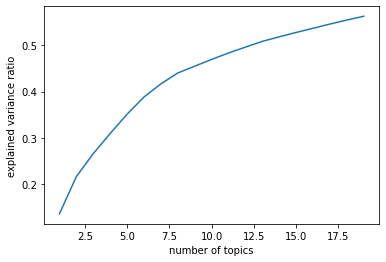

In [32]:
numberOfTopics=[]
explained_v=[]
for n_topics in range(1,20):
    lsa = TruncatedSVD(n_topics)
    doc_topic = lsa.fit_transform(c)
    lsa.explained_variance_ratio_
    numberOfTopics.append(len(lsa.explained_variance_ratio_))
    explained_v.append(sum(lsa.explained_variance_ratio_))
plt.plot(numberOfTopics,explained_v)
plt.xlabel('number of topics')
plt.ylabel('explained variance ratio')

In [33]:
 lsa = TruncatedSVD(7)
doc_topic = lsa.fit_transform(c)


In [34]:
display_topics(lsa, cv1.get_feature_names(), 10)


Topic  0
game, team, player, world, one, nba, new, time, year, horizon

Topic  1
team, nba, player, jvbl, league, school, pf, pt, year, contract

Topic  2
world, banjo, character, duo, tooie, transformation, original, mumbo, kazooie, first

Topic  3
tensei, megami, shin, nintendo, party, switch, combat, jrpg, player, mario

Topic  4
pf, pt, megami, tensei, shin, ast, stl, blk, pm, com

Topic  5
party, mario, superstar, board, minigames, nintendo, nostalgia, pf, new, pt

Topic  6
game, second, dive, rule, overwatch, brigitte, hero, submission, information, shot


In [35]:
df['token']=df.post.map(word_tokenize)

In [36]:
texts = df['token']
dictionary = Dictionary(texts)
dictionary.filter_extremes( no_below=3 ,no_above=0.85 ,keep_n=5000 )
corpus = [dictionary.doc2bow(text) for text in texts]
topic_nums = list(np.arange(5, 50, 5))

In [37]:
coherence_scores = []
for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# plot number of topics Vs coherence_scores
plt.plot(topic_nums,coherence_scores)
plt.xticks(topic_nums);
plt.xlabel('number of topics')
plt.ylabel('coherence score')

NameError: name 'Nmf' is not defined

In [ ]:

coherence_scores

In [ ]:
topic_nums

In [ ]:
plt.plot(topic_nums,coherence_scores)
plt.xticks(topic_nums);

In [ ]:
#topic_word.to_csv('word_weight.csv')

In [38]:
##ploting word weight for each topic
df1=topic_word.T
names=[]
for i in range(1,11):
    name='topic'+str(i)
    names.append(name)
    
df1.columns=names
df1=df1.iloc[1:]
df1

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
aaron,0.000,0.003,0.000,0.000,0.319,0.000,0.000,0.0,0.003,0.000
aau,0.000,0.313,0.000,0.000,0.000,0.000,0.002,0.0,0.000,0.000
ab,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.002,0.000
aba,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.0,0.004,0.000
abandon,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.0,0.000,0.001
...,...,...,...,...,...,...,...,...,...,...
сhina,0.000,0.002,0.001,0.000,0.001,0.000,0.000,0.0,0.003,0.000
细拉,0.004,0.001,0.000,0.001,0.000,0.001,0.003,0.0,0.002,0.003
阿姆西,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.0,0.000,0.000
震旦与食人魔实机兵种展示,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.0,0.000,0.000


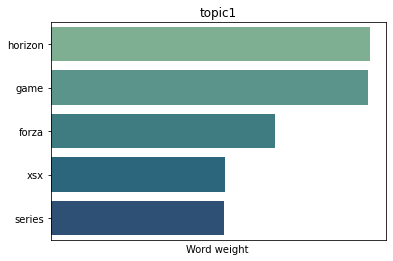

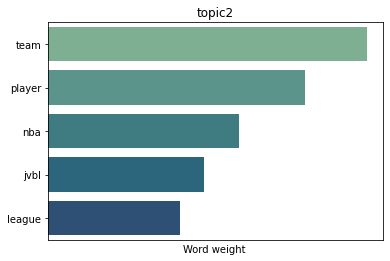

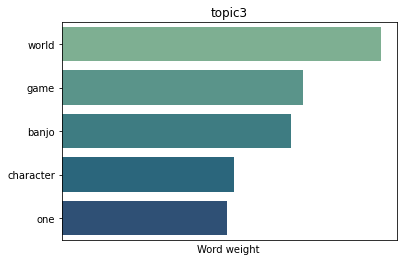

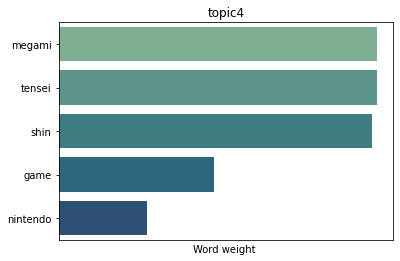

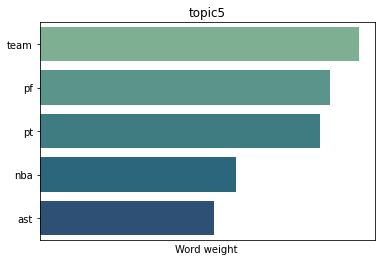

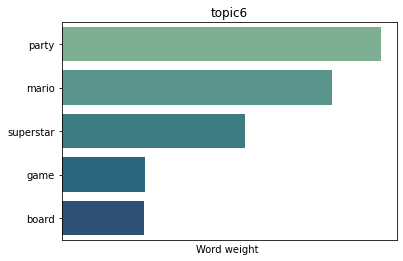

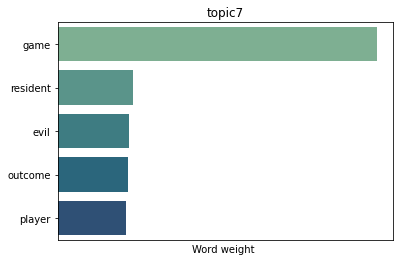

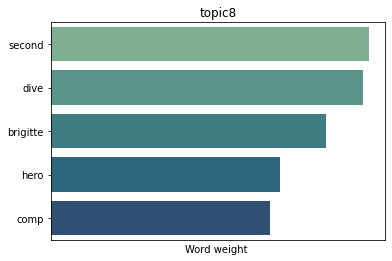

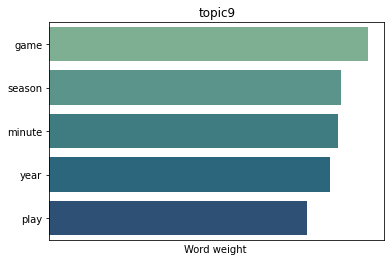

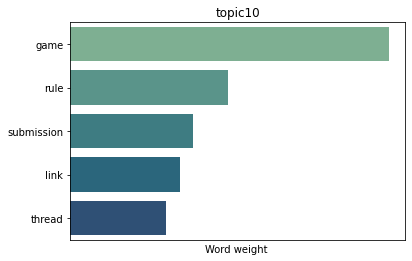

In [39]:
for col in df1.columns:
    temp=df1.sort_values(by=col,ascending=False).iloc[0:5]
    plt.figure()
    sns.barplot(data=temp,y=temp.index,x=temp[col],palette="crest")
    plt.xticks([])
    plt.xlabel('Word weight ')
    plt.title(col);
    